In [1]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

from pathlib import Path

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

/var/folders/wl/5x49grmn56v77c01bw965mj00000gn/T/ipykernel_26358/679762080.py:1: FutureWarning: Use `print_header` instead
  sc.logging.print_versions()


In [3]:
adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

/var/folders/wl/5x49grmn56v77c01bw965mj00000gn/T/ipykernel_26358/562932817.py:1: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata_spatial_anterior = sc.datasets.visium_sge(


  0%|          | 0.00/8.81M [00:00<?, ?B/s]

  0%|          | 0.00/19.6M [00:00<?, ?B/s]

reading /Users/QZhu/Documents/CONCORD/Concord_benchmark/notebook/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5


/opt/anaconda3/envs/concord/lib/python3.12/site-packages/scanpy/datasets/_datasets.py:558: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)


 (0:00:00)


/opt/anaconda3/envs/concord/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/concord/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/wl/5x49grmn56v77c01bw965mj00000gn/T/ipykernel_26358/562932817.py:4: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata_spatial_posterior = sc.datasets.visium_sge(


  0%|          | 0.00/9.26M [00:00<?, ?B/s]

  0%|          | 0.00/20.1M [00:00<?, ?B/s]

reading /Users/QZhu/Documents/CONCORD/Concord_benchmark/notebook/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5


/opt/anaconda3/envs/concord/lib/python3.12/site-packages/scanpy/datasets/_datasets.py:558: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)


 (0:00:00)


/opt/anaconda3/envs/concord/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/concord/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata_spatial_anterior.var_names_make_unique()
adata_spatial_posterior.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_spatial_anterior, inplace=True)
sc.pp.calculate_qc_metrics(adata_spatial_posterior, inplace=True)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [6]:
adatas = [adata_spatial_anterior, adata_spatial_posterior]
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 32285 genes among all datasets
[[0.         0.00037106]
 [0.         0.        ]]


In [7]:
adata_spatial = sc.concat(
    adatas_cor,
    label="library_id",
    uns_merge="unique",
    keys=[
        k
        for d in [
            adatas_cor[0].uns["spatial"],
            adatas_cor[1].uns["spatial"],
        ]
        for k, v in d.items()
    ],
    index_unique="-",
)


In [8]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(
    adata_spatial, key_added="clusters", n_iterations=2, flavor="igraph", directed=False
)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)
running Leiden clustering
    finished: found 24 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


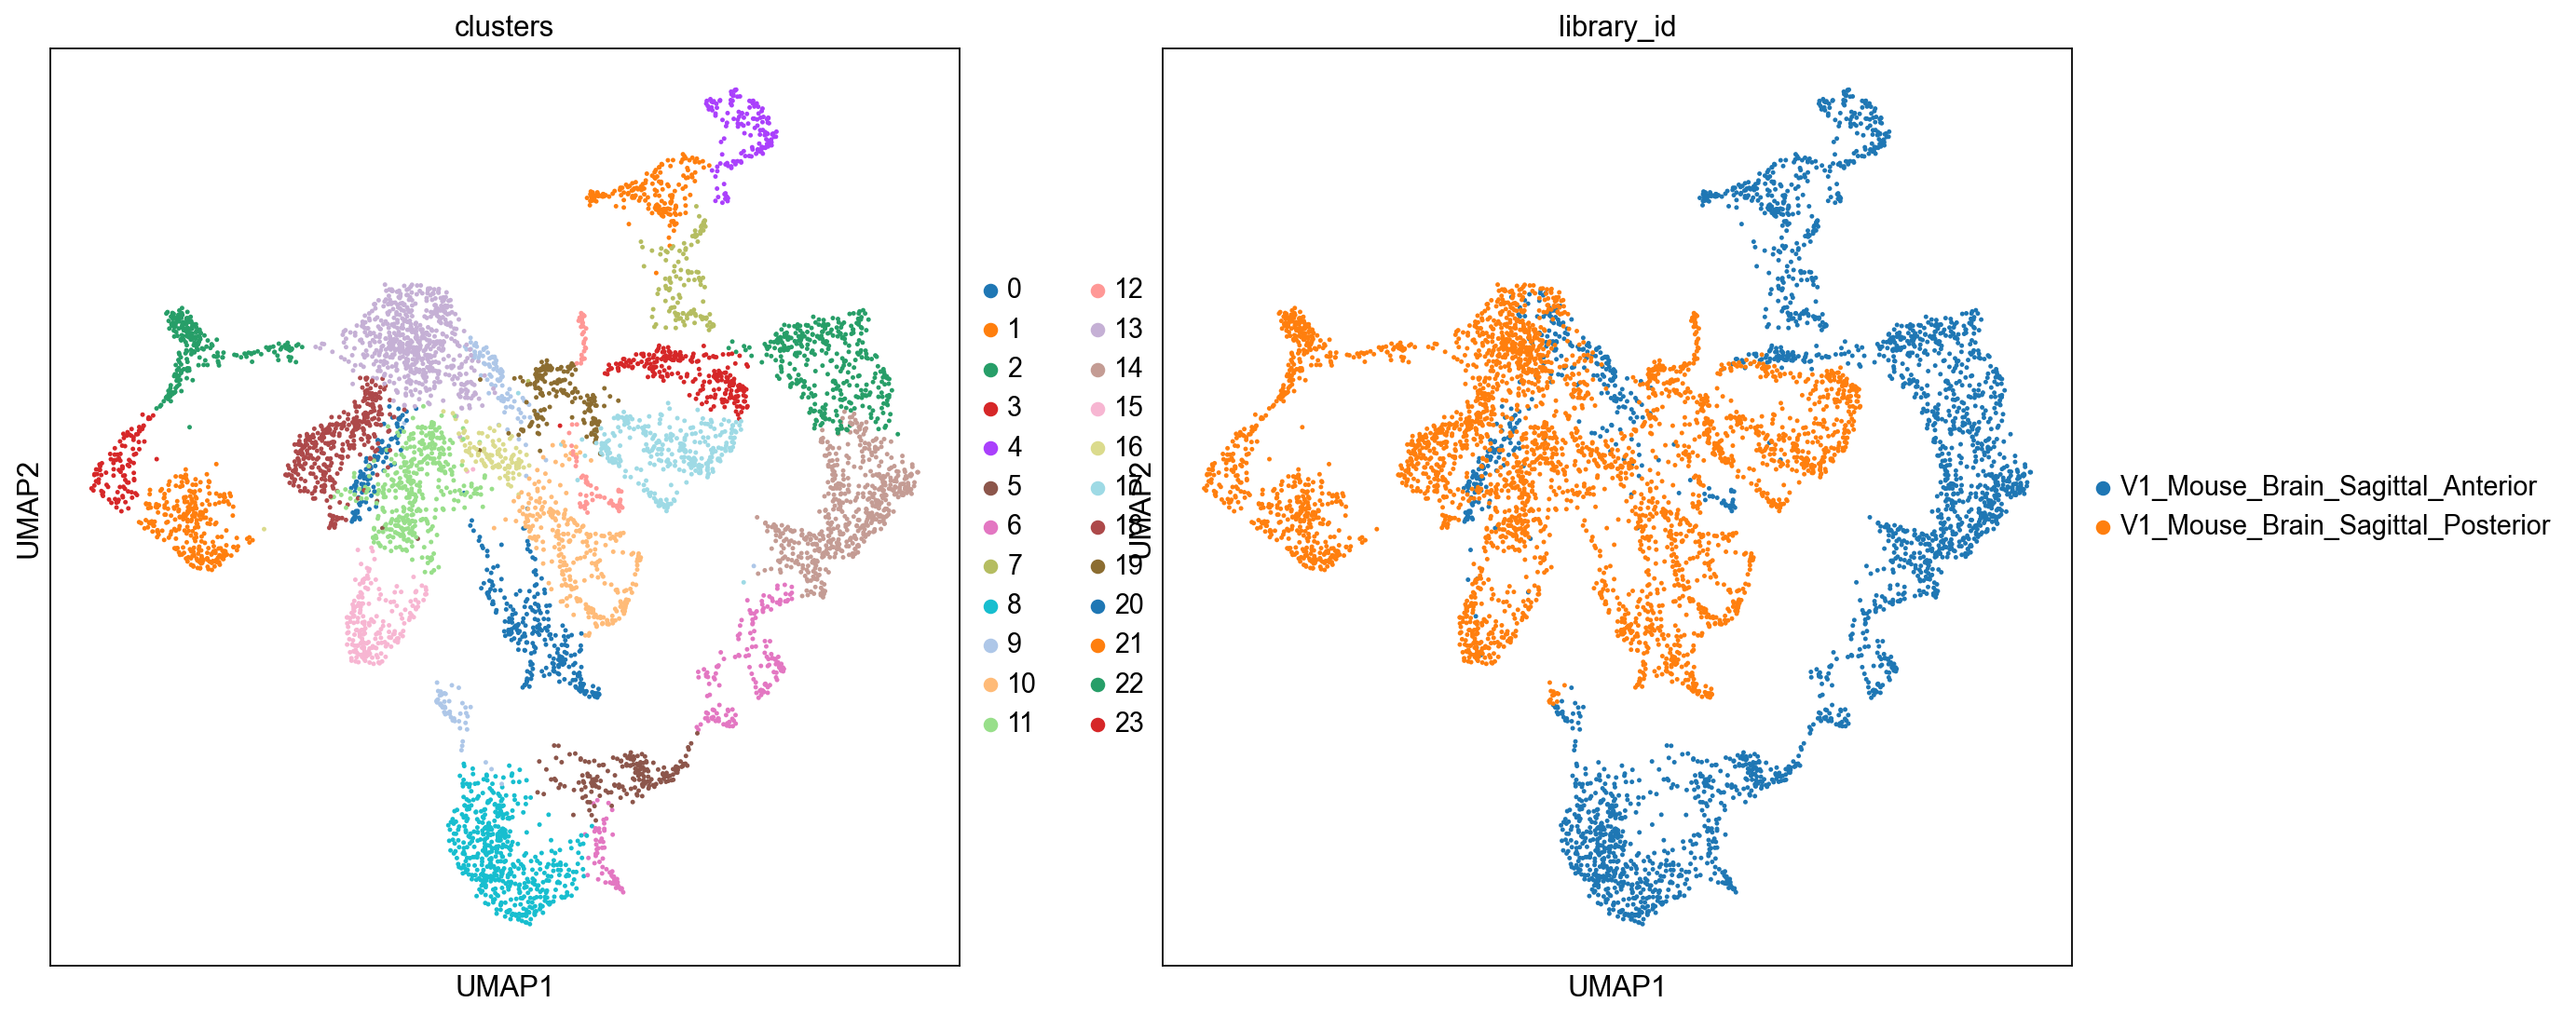

In [9]:
sc.pl.umap(
    adata_spatial, color=["clusters", "library_id"], palette=sc.pl.palettes.default_20
)

In [10]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_spatial.uns["clusters_colors"])
)

/var/folders/wl/5x49grmn56v77c01bw965mj00000gn/T/ipykernel_26358/1821732952.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/var/folders/wl/5x49grmn56v77c01bw965mj00000gn/T/ipykernel_26358/1821732952.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


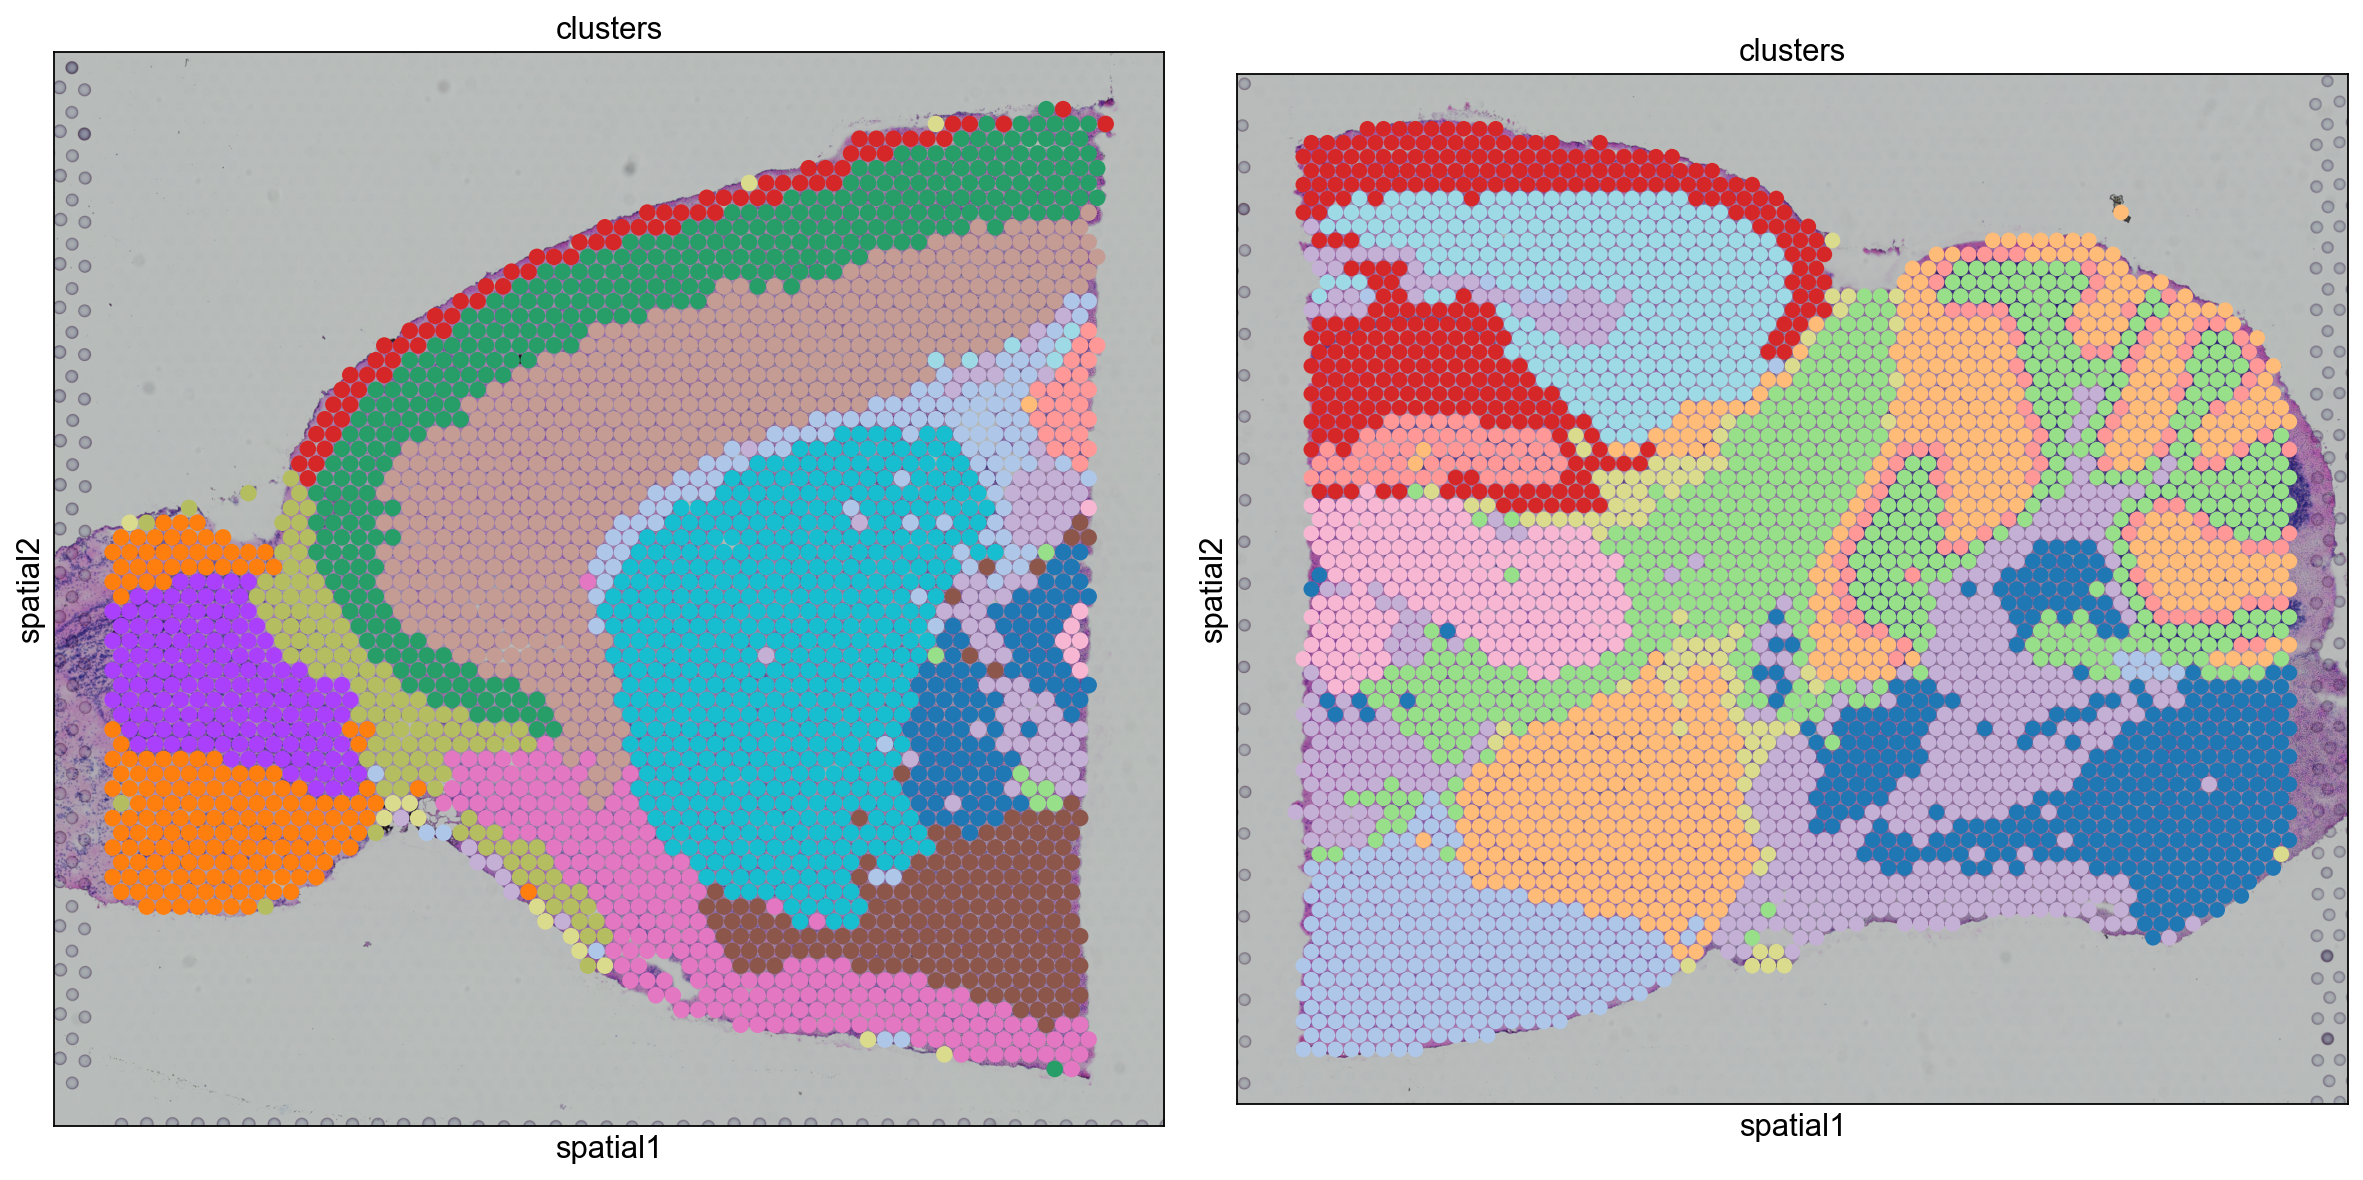

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for i, library in enumerate(
    ["V1_Mouse_Brain_Sagittal_Anterior", "V1_Mouse_Brain_Sagittal_Posterior"]
):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="clusters",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )

plt.tight_layout()